<a href="https://colab.research.google.com/github/lsmanoel/Python_DSP/blob/master/filters/KalmanFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kalman Filter

source: [Implementation of Kalman Filter with Python Language  ](https://arxiv.org/pdf/1204.0375.pdf) by Mohamed LAARAIEDH 

The state space  representation of Kalman Filter:

$$ x(k) = \textbf{A}x(k-1)+\textbf{B}u(k)+w(k-1) $$
$$ y(k) = \textbf{H}x(k) + v(k) $$

The random variables $w$ and $v$ represent the process and measurement white noise respectively:

$$p(w) \simeq N(0, Q)$$
$$p(v) \simeq N(0, R)$$

The process of this filter is composed of two steps:

*   Prediction step:
$$x⁻(k) = \textbf{A}x(k-1)+\textbf{B}u(k)$$
$$P⁻(k) = \textbf{A}P(k-1)\textbf{A}^{T}+Q(k-1)$$
*   Update step:
$$v(k) = y(k) - \textbf{H}x⁻(k) $$
$$s(k) = \textbf{H}P⁻(k)\textbf{H}^{T} + R(k)$$
$$K(k) = P⁻(k)\textbf{H}^{T}s^{-1}(k)$$
$$x(k) = x⁻(k) + K(k)v(k)$$
$$P(k) = P⁻(k) - K(k)s(k)K^{T}(k)$$

$x⁻(k)$ and $P⁻(k)$ are the predicted mean and covariance of the state, respectively, on the time step k before seeing the measurement.

$x⁻(k)$ and $P⁻(k)$ are the estimated mean and covariance of the state, respectively, on time step k after seeing the measurement.

$y(k)$ is mean of the measurement on time step k .

$v(k)$ is the innovation or the measurement residual on time step k .

$s(k)$ is the measurement prediction covariance on the time step k .

$K(k)$ is the filter gain, which tells how much the predictions should be corrected on time step k .

The step has to predict the mean X and the covariance P of the system state at the time step k.


>X : The mean state estimate of the previous step ( k −1).

>P : The state covariance of previous step ( k −1).

>A : The transition n n × matrix.

>Q : The process noise covariance matrix.

>B : The input effect matrix.

>U : The control input.








In [0]:
from numpy import dot

def kf_predict(X, P, A, Q, B, U):
  X = dot(A, X) + dot(B, U)
  P = dot(A, dot(P, A.T)) + Q
  return(X, P)

At the time step k, this update step computes the posterior mean X and covariance P of the system state given a ney measurement Y. The function kf_update() performs the update of X and P giving the predicted X and P matrices, the measurement vector Y, the measurement matrix H and the measurement  covariance matrix R.

>K : the Kalman Gain matrix

>IM : the Mean of predictive distribution of Y

>IS : the Covariance or predictive mean of Y

>LH : the Predictive probability (likelihood) of measurement which is
computed using the Python function gauss_pdf().


In [0]:
from numpy import dot

def kf_update(X, P, Y, H, R):
  IM = dot(H, X)
  IS = R + dot(H, dot(P, H.T))
  K = dot(P, dot(H.T, inv(IS)))
  X = X + dot(K, (Y-IM))
  P = P - dot(K, dot(IS, K.T))
  LH = gauss_pdf(Y, IM, IS)
  return (X, P, K, IM, IS, LH)

In [0]:
from numpy import dot
from numpy.linalg import det

def gauss_pdf(X, M, S):
  if M.shape[1] == 1:
    DX = X - tile(M, X.shape[1])
    E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
    E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
    P = exp(-E)
  elif X.shape[1] == 1:
    DX = tile(X, M.shape[1])- M
    E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
    E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
    P = exp(-E)
  else:
    DX = X-M
    E = 0.5 * dot(DX.T, dot(inv(S), DX))
    E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
    P = exp(-E)
  return (P[0],E[0])

In [0]:
import numpy as np

def randn(n):
  return np.random.normal(0, 0.5, n)

**Example of application: Tracking of mobile in wireless
network:**

The most interesting field of application of Kalman Filter, in telecommunications, is
the tracking of a mobile user connected to a wireless network. In this section, we
will present a simple tracking algorithm of a mobile user who is moving in a room
and connected to at least three wireless antennas.
The matrix of measurement Y describes the estimated position of the mobile using a
trilateration algorithm based on a least square estimation and the knowledge of at
least three values of Time of Arrival (ToA) at time step k . These values are
computed using ranging procedures between the mobile and the three antennas.
Starting by an initialization of different matrices and using the updated matrices for
each step and iteration, we plot in Fig- 1 the estimated, the real trajectory of the
mobile user, and the measurements performed by the least square based trilateration.
We show here that the Kalman Filter enhances the accuracy of tracking compared to
the static least square based estimation. The Python code describing the tracking
process is given as below. In order to simplify the understanding of this code, we
draw the matrix Y randomly centered on the true value of mobile position.

(2, 50)


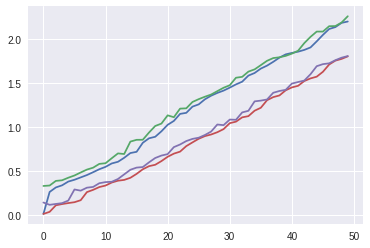

In [12]:
import numpy as np
from numpy import *
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline

#time step of mobile movement
dt = 0.1

# Initialization of state matrices
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]])
Q = eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1))

# Measurement matrices
Y = array([[X[0,0] + abs(randn(1)[0])], [X[1,0] + abs(randn(1)[0])]])
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])

# Number of iterations in Kalman Filter
N_iter = 50

# Applying the Kalman Filter

IMplotOut = np.zeros((IM.shape[0], N_iter))
YplotOut = np.zeros((Y.shape[0], N_iter))
print(plotOut.shape)
for i in arange(0, N_iter):
  (X, P) = kf_predict(X, P, A, Q, B, U)
  (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
  Y = array([[X[0, 0] + abs(0.1 * randn(1)[0])], [X[1, 0] + abs(0.1 * randn(1)[0])]])
  IMplotOut[:, i] = IM[:, 0]
  YplotOut[:, i] = Y[:, 0]
  
  
  
plt.plot(IMplotOut[0, :])
plt.plot(YplotOut[0, :])
plt.plot(IMplotOut[1, :])
plt.plot(YplotOut[1, :])
plt.show()